# 03 Q-agent hyperparameters analysis

#### 👉RL agents are extremely sensitive to hyper-parameters.

#### 👉In the previous notebook you trusted me when I set them, but in reality you will need to tune them yourself.

#### 👉Let's play with them in a systematic way to gain a better intuition of how they impact learning.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
!pip install gymnasium

In [3]:
import gymnasium as gym

# Initialise the environment
env = gym.make("Taxi-v3").env

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Q-agent 🤖🧠

In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/01_taxi/notebooks/src')  # Add the parent directory to the path
# No need to copy paste the same QAgent
# definition in every notebook, don't you think?
from src.q_agent import QAgent

# hyper-parameters
# RL problems are full of these hyper-parameters.
# For the moment, trust me when I set these values.
# We will later play with these and see how they impact learning.
alphas = [0.01, 0.1, 1]
gammas = [0.1, 0.6, 0.9]

## Training loop 🎡

In [6]:
import pandas as pd

from src.loops import train

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1
n_episodes = 1000

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:

        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)

        _, timesteps, penalties = train(agent,
                                        env,
                                        n_episodes,
                                        epsilon)

        # collect timesteps and penalties for this pair
        # of hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

# add column with the 2 hyper-parameters
results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])
]

alpha: 0.01, gamma: 0.1


  0%|          | 0/1000 [00:00<?, ?it/s]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Axes: xlabel='episode', ylabel='timesteps'>

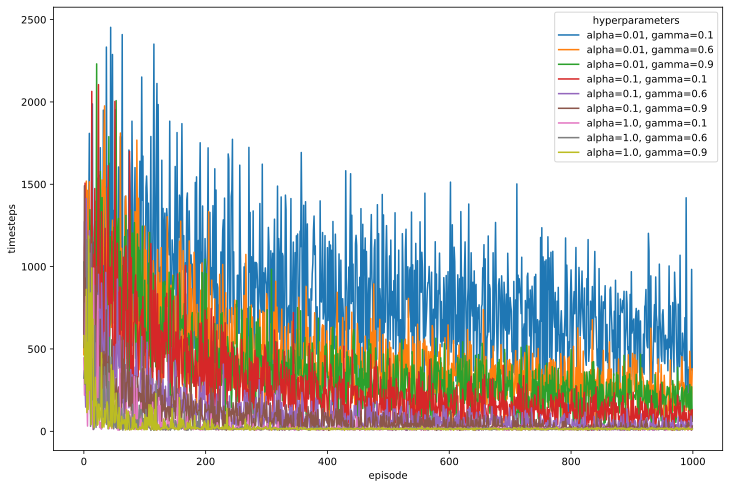

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(12, 8)
# Correctly specify 'x', 'y', and 'hue' parameters with the 'data' argument
sns.lineplot(x='episode', y='timesteps', hue='hyperparameters', data=results)

## That looks cool! 😎 But a bit too noisy... 😵‍💫
## What about averaging over several runs?

In [ ]:
from src.loops import train_many_runs

alphas = [0.1, 1]
gammas = [0.1, 0.6, 0.9]

epsilon = 0.1
n_episodes = 1000
n_runs = 10

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:

        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)

        timesteps, penalties = train_many_runs(agent,
                                               env,
                                               n_episodes,
                                               epsilon,
                                               n_runs)

        # collect timesteps and penalties for this pair of
        # hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])]

alpha: 0.1, gamma: 0.1
alpha: 0.1, gamma: 0.6
alpha: 0.1, gamma: 0.9
alpha: 1, gamma: 0.1
alpha: 1, gamma: 0.6
alpha: 1, gamma: 0.9


<Axes: xlabel='episode', ylabel='timesteps'>

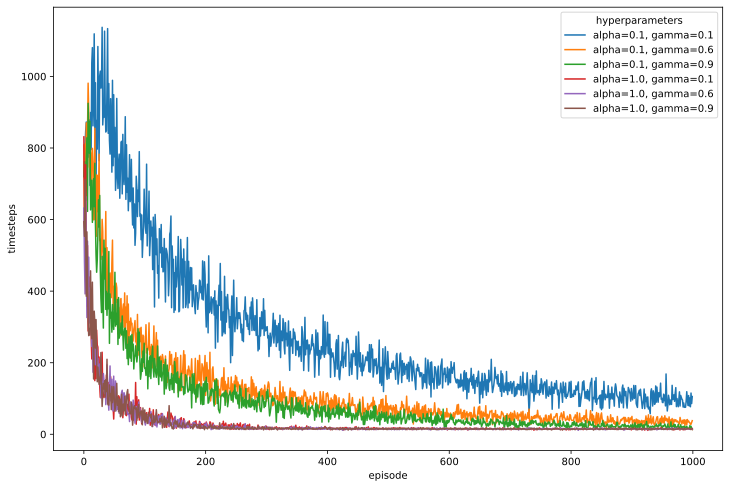

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
# Use column names for 'x' and 'y' when providing 'data'
sns.lineplot(x='episode', y='timesteps', hue='hyperparameters', data=results)

## Nice one!

## What about `epsilon`? Is the current value of 10% the best?

In [ ]:
# best hyper-parameters so far
alpha = 1.0
gamma = 0.9

epsilons = [0.01, 0.10, 0.9]
n_runs = 10
n_episodes = 1000

results = pd.DataFrame()
for epsilon in epsilons:

    print(f'epsilon: {epsilon}')
    agent = QAgent(env, alpha, gamma)

    timesteps, penalties = train_many_runs(agent,
                                           env,
                                           n_episodes,
                                           epsilon,
                                           n_runs)

    # collect timesteps and penalties for this pair of
    # hyper-parameters (alpha, gamma)
    results_ = pd.DataFrame()
    results_['timesteps'] = timesteps
    results_['penalties'] = penalties
    results_['epsilon'] = epsilon
    results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

epsilon: 0.01
epsilon: 0.1
epsilon: 0.9


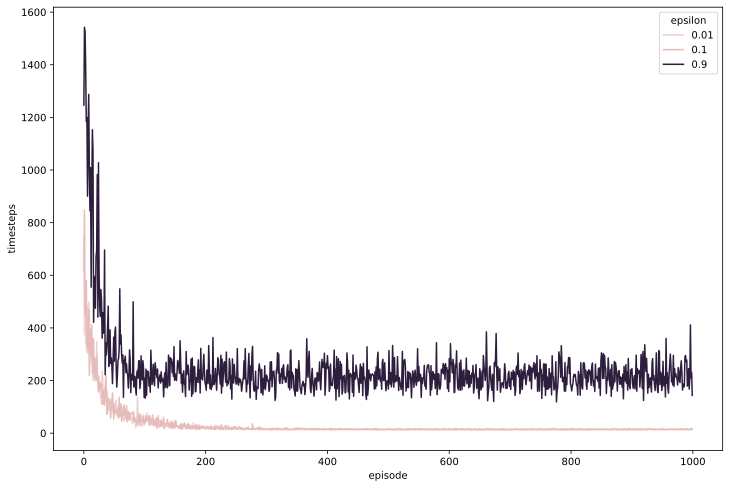

<Axes: xlabel='episode', ylabel='penalties'>

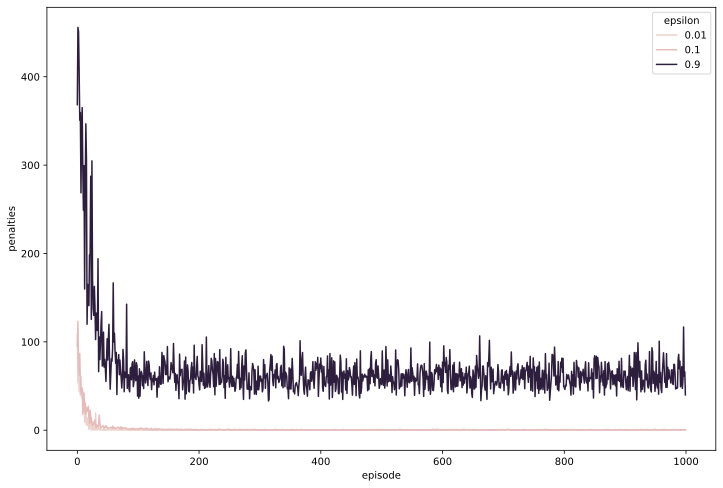

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
# Specify 'x', 'y', and 'hue' as column names within 'data'
sns.lineplot(x='episode', y='timesteps', hue='epsilon', data=results)
plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 8)
# Specify 'x', 'y', and 'hue' as column names within 'data'
sns.lineplot(x='episode', y='penalties', hue='epsilon', data=results)